In [20]:
%matplotlib notebook
import matplotlib.pyplot as plt
from colicoords import RDistModel, PSF
from colicoords import CellListPlot, save, load, SynthCellList, CellPlot
from tqdm import tqdm_notebook
import numpy as np

In [55]:
lengths = np.random.normal(40, 5, 100)
radii = np.random.normal(8, 0.4, 100)
curvatures = np.random.normal(0, 0.0075, 100)

<IPython.core.display.Javascript object>


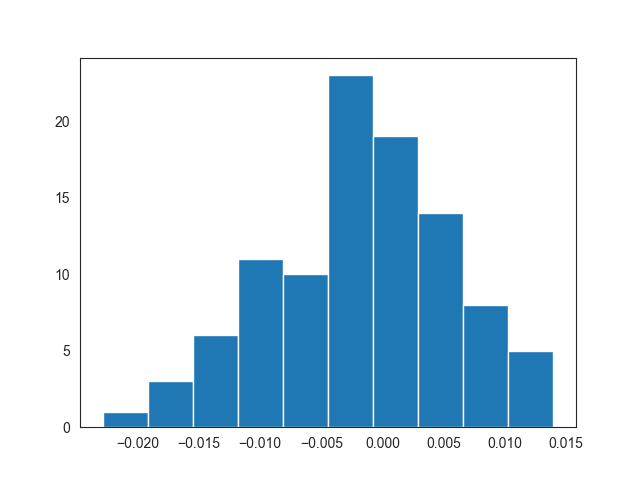

In [56]:
plt.figure()
h = plt.hist(curvatures)

In [57]:
lengths

array([47.31453926, 44.08629182, 43.18023987, 46.64303115, 35.7758976 ,
       41.97158498, 43.176437  , 39.72368642, 35.30762672, 44.05515657,
       38.20740542, 41.94844706, 43.05227334, 31.72777091, 43.89520772,
       30.865829  , 42.85310067, 43.39003958, 43.30561008, 38.611221  ,
       51.43548864, 41.04915299, 55.94945469, 38.89113195, 35.4154855 ,
       38.60840427, 36.07846492, 45.68202799, 43.84354516, 36.75222942,
       36.13977329, 48.29670374, 41.16496335, 42.34470423, 38.00395278,
       32.55240952, 39.84577001, 34.23626686, 36.02479519, 45.63065474,
       38.50293708, 32.76131497, 48.68691247, 45.96149683, 43.36540712,
       45.36314712, 42.05383251, 48.75015215, 44.66139272, 38.99509474,
       34.92761141, 40.06882122, 30.45719889, 39.64280263, 40.13370227,
       32.66485484, 34.08439843, 37.32556172, 35.99137578, 41.04105469,
       33.44075611, 48.10650319, 36.67406917, 44.97767187, 40.70981133,
       41.04030606, 40.7748052 , 37.11958649, 39.19278089, 42.22

In [50]:
radii

array([8.34721653, 7.45881977, 7.76553983, 8.50486418, 7.55075637,
       8.38871867, 7.70657753, 8.26380249, 7.92842481, 7.81224317,
       8.14602407, 8.30944158, 8.48175155, 8.30135611, 8.10171974,
       8.19833264, 8.56562742, 7.42583174, 8.67551082, 8.09222201,
       7.99791194, 8.32966813, 7.98581723, 8.60562123, 7.91627901,
       7.81701473, 7.81705862, 7.57033992, 8.31933953, 8.09086691,
       7.93349033, 7.69206569, 7.20294154, 8.27191789, 8.73337813,
       7.85331335, 7.90372195, 8.28470031, 7.87714195, 8.40025897,
       8.75571716, 8.51513267, 7.60974484, 7.12146615, 8.27484397,
       8.36203895, 8.53137322, 8.10825395, 7.36662147, 8.1355568 ,
       8.380392  , 8.3362773 , 8.01343632, 7.95311399, 8.12616113,
       7.6458774 , 8.17476371, 8.09979306, 7.82789833, 7.53785969,
       7.98874011, 7.85608839, 7.44757573, 8.50568788, 8.56630615,
       7.91442207, 8.76095471, 7.86610632, 8.21170451, 8.10432918,
       7.64874918, 7.86470782, 8.22527662, 8.33252632, 8.67622

In [58]:
cell_list = SynthCellList(lengths, radii, curvatures)

<IPython.core.display.Javascript object>


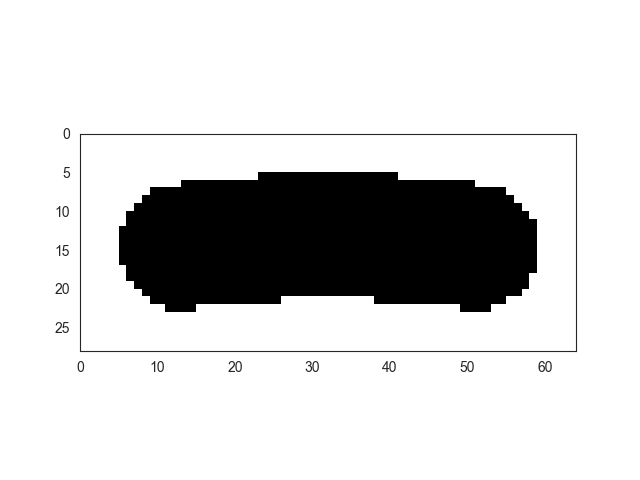

In [60]:
plt.figure()
cp = CellPlot(cell_list[10])
cp.imshow('binary')

In [68]:
cell_list = SynthCellList(lengths, radii, curvatures)
psf = PSF(1.54)
rmodel = RDistModel(psf)
for cell in tqdm_notebook(cell_list):
    a2 = np.random.normal(0.85, 0.07)
    a1 = 1 - a2
    r1 = cell.coords.r
    r2 = 0.9*cell.coords.r
    par_dict = {'a1':a1, 'a2':a2, 'r1':r1, 'r2':r2}
    rmodel.sub_par(par_dict)
    
    cell.add_radial_model_data(rmodel, num=100)

c:\users\smit\pycharmprojects\colicoords\colicoords\models.py:29: RuntimeWarning: invalid value encountered in sqrt
  return psf(x - v) * np.nan_to_num(np.sqrt(r1 ** 2 - x ** 2))
c:\users\smit\pycharmprojects\colicoords\colicoords\models.py:38: RuntimeWarning: invalid value encountered in sqrt
  return psf(x - v) * np.nan_to_num(np.sqrt(1 + (x ** 2 / (r2 ** 2 - x ** 2))))


C:\Miniconda3\envs\py_main\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [22]:
save('cells_temp.hdf5', cell_list)

In [26]:
cl_bak = cell_list

In [69]:
cl_bk2 = cell_list.copy()

In [39]:
for cell in cell_list:
    try:
        del cell.data.data_dict['storm']
    except:
        pass
    try:
        del cell.data.storm_dict['storm']
    except:
        pass

In [70]:
for cell in tqdm_notebook(cell_list):
    num = int(np.random.normal(350, 100))
    cell.add_storm_membrane(num, 0.9*cell.coords.r, r_std=0.1*cell.coords.r)

<IPython.core.display.Javascript object>


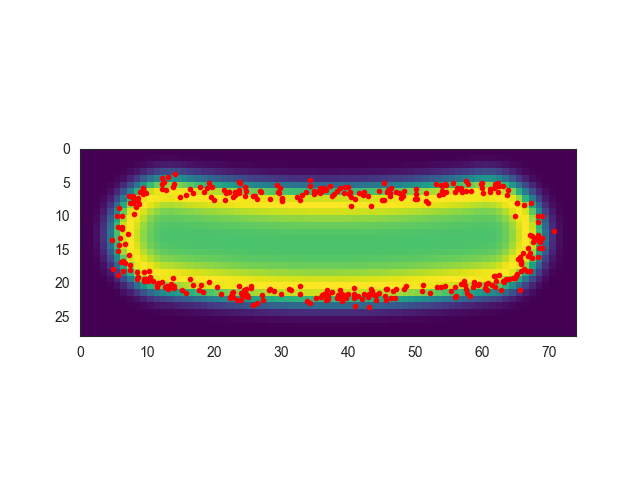

In [74]:
plt.figure()
cp = CellPlot(cell_list[0])
cp.imshow('fluorescence')
cp.plot_storm(method='plot')

In [75]:
save('fake_data_new.hdf5', cell_list)